## Content
- [1. Импорт библиотек и вводная теория](#first-bullet)
- [2. Покрутим модель](#second-bullet)
- [3. Сделаем домашку](#third-bullet")

### 1. Импорт библиотек и вводная теория <a class="anchor" id="first-bullet"></a>

In [ ]:
import pymc3 as pm

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
import arviz as az

Априорная вероятность (Prior probability) (Безусловная вероятность)
P(A) — исходная (априорная) степень уверенности в истинности утверждения A

Апостериорная вероятность (Posterior probability) (Послеопытная вероятность, Условная вероятность)
P(A|B) — итоговая (апостериорная) степень уверенности в истинности утверждения A, при условии B


<img src="../image/Bayes_theorem.png" alt="isolated"/>


https://wiki.loginom.ru/articles/bayes-theorem.html

### 2. Покрутим модель <a class="anchor" id="second-bullet"></a>

In [44]:
n = 250
p = 0.5 # вероятность выпадения орла или решки

sample_binom = pm.Binomial.dist(n, p).random(size = 1000)

<AxesSubplot:ylabel='Probability'>

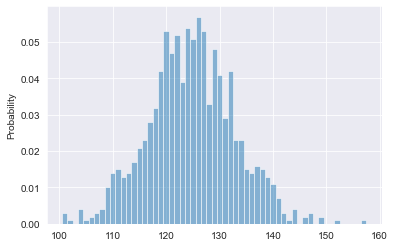

In [74]:
sns.histplot(sample_binom, stat='probability', discrete=True, alpha = 0.5, label ="Binomial")

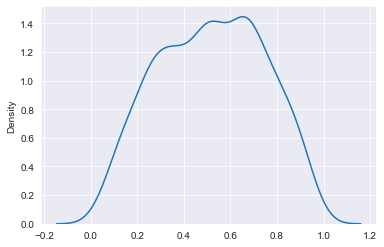

In [75]:
a = 2
b = 2

sample_beta = pm.Beta.dist(alpha=a, beta=b).random(size=1000)
sns.kdeplot(sample_beta, label='Beta');

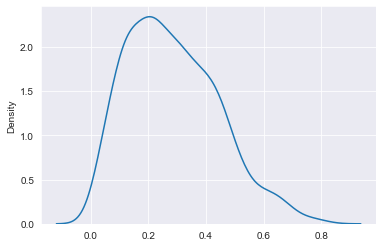

In [76]:
a = 2
b = 5

sample_beta = pm.Beta.dist(alpha=a, beta=b).random(size=1000)
sns.kdeplot(sample_beta, label='Beta');

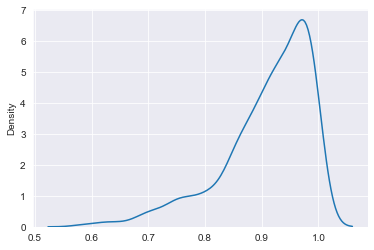

In [77]:
a = 10
b = 1

sample_beta = pm.Beta.dist(alpha=a, beta=b).random(size=1000)
sns.kdeplot(sample_beta, label='Beta');

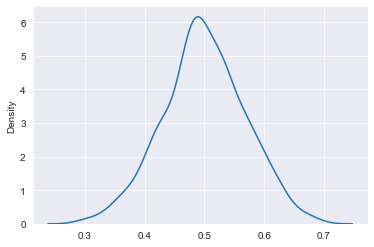

In [82]:
a = 25
b = 25

sample_beta = pm.Beta.dist(alpha=a, beta=b).random(size=1000)
sns.kdeplot(sample_beta, label='Beta');

In [47]:
a = 2
b = 2
n = 250

with pm.Model() as model1:
    x = pm.Beta('x', alpha=a, beta=b)
    k = pm.Binomial('k', n=n, p=x) #количество орлов от 0 до n
    trace1 = pm.sample_prior_predictive(1000)


In [51]:
# pm.model_to_graphviz(model1)

In [49]:
# априорная оценка
sample_prior = trace1['x']

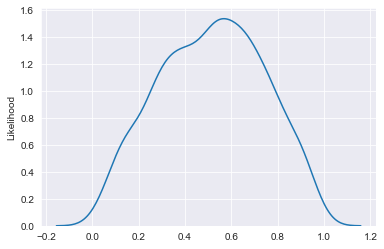

In [83]:
sns.kdeplot(sample_prior);
plt.ylabel("Likelihood");

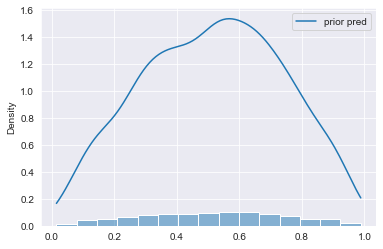

In [89]:
sns.kdeplot(sample_prior, cut=0, label='prior pred');
sns.histplot(sample_prior, stat='probability', discrete=False,
             alpha=0.5);
plt.legend();

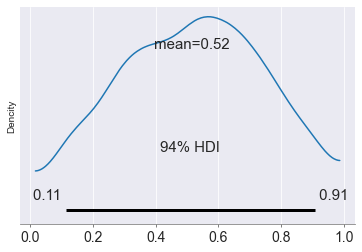

In [84]:
az.plot_posterior(sample_prior)
plt.ylabel('Dencity');
plt.title('');

### 3. Сделаем домашку <a class="anchor" id="third-bullet"></a>

Задание: Мы можем использовать апостериорное прогнозируемое распределение для предсказания того, что произойдет, если мы снова подбросим ту же монету.
Используйте sample_posterior_predictive для генерации выборки k, а затем используйте sns.hist для построения графика апостериорного предсказательного распределения.

Для начала запустим с теми же параметрами, что и в лекции и посмотрим для k = 140

In [147]:
k_obs = 140 #вероятность выбросить 140 орлов
with pm.Model() as model2:
    x = pm.Beta('x', alpha=a, beta=b)
    k = pm.Binomial('k', n=n, p=x, observed=k_obs)

In [148]:
with model2:
    trace2 = pm.sample(500)

/Users/ea.samoylova/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 38 seconds.


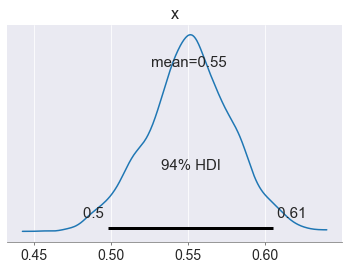

In [149]:
with model2:
    az.plot_posterior(trace2)

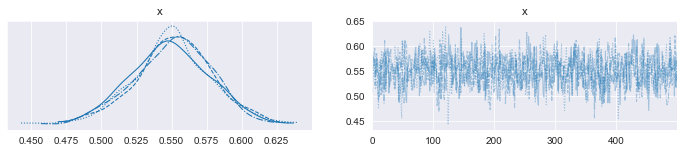

In [150]:
with model2:
    az.plot_trace(trace2)

In [151]:
with model2:
    post_pred = pm.sample_posterior_predictive(trace2)

In [152]:
sample_post_pred = post_pred['k']
sample_post_pred.mean()

137.754

Text(0.5, 1.0, 'Distribution')

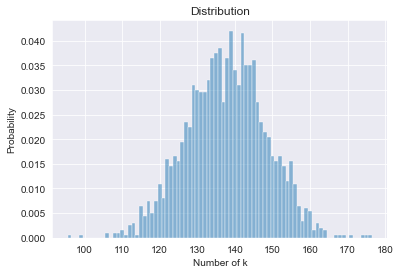

In [161]:
sns.histplot(sample_post_pred, label='posterior pred', stat='probability', discrete=True,
             alpha=0.5)
plt.xlabel('Number of k')
plt.ylabel('Probability')
plt.title('Distribution')

In [164]:
k_obs = 100

with pm.Model() as model3:
    x = pm.Beta('x', alpha=2, beta=2)
    k = pm.Binomial('k', n=n, p=x, observed=k_obs)

In [165]:
with model3:
    trace3 = pm.sample(500)

/Users/ea.samoylova/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 43 seconds.


In [166]:
with model3:
    post_pred_3 = pm.sample_posterior_predictive(trace3)
sample_post_pred_3 = post_pred_3['k']
sample_post_pred_3.mean()

100.249

Text(0.5, 1.0, 'Distribution')

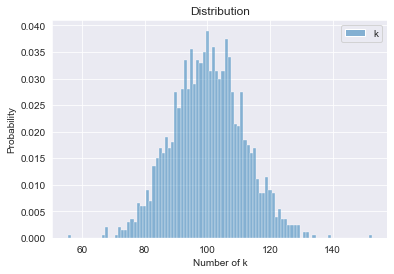

In [167]:
sns.histplot(post_pred_3, label='posterior pred', stat='probability', discrete=True,
             alpha=0.5)
plt.xlabel('Number of k')
plt.ylabel('Probability')
plt.title('Distribution')

In [168]:
k_obs = 50

with pm.Model() as model3:
    x = pm.Beta('x', alpha=2, beta=2)
    k = pm.Binomial('k', n=n, p=x, observed=k_obs)
    trace4 = pm.sample(500)
    post_pred_4 = pm.sample_posterior_predictive(trace4)

/Users/ea.samoylova/opt/anaconda3/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [x]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 74 seconds.


Text(0.5, 1.0, 'Distribution')

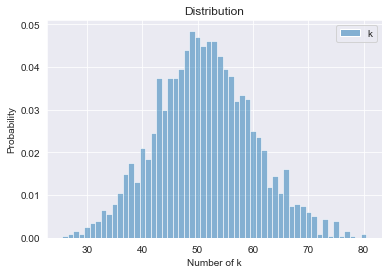

In [169]:
sns.histplot(post_pred_4, label='posterior pred', stat='probability', discrete=True, alpha=0.5)
plt.xlabel('Number of k')
plt.ylabel('Probability')
plt.title('Distribution')